In [44]:
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model, Sequential

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

from tensorflow.keras.layers import Dense, Conv1D, LSTM, Lambda, Reshape, RNN, LSTMCell




import warnings
warnings.filterwarnings('ignore')

In [45]:
plt.rcParams['figure.figsize'] = (10, 7.5)
plt.rcParams['axes.grid'] = False

In [46]:
print(tf.__version__)

2.9.2


In [47]:
tf.random.set_seed(42)
np.random.seed(42)

In [48]:
df = pd.read_csv(r"/content/drive/MyDrive/Project BT19MEC022/Dataset/data_for_presentation.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,datetime,tempmax,tempmin,temp,precip,windspeed,winddir
0,0,0,2017-03-12,32.0,20.6,26.1,0.0,18.4,354.0
1,1,1,2017-03-13,33.0,15.2,24.6,0.0,12.6,61.4
2,2,2,2017-03-14,34.0,15.0,25.0,0.0,11.2,72.3
3,3,3,2017-03-15,34.0,18.0,26.5,0.0,12.2,75.1
4,4,4,2017-03-16,35.0,21.0,27.5,1.7,14.8,152.8


In [49]:
import datetime
timestamps=pd.to_datetime(df['datetime']).map(datetime.datetime.timestamp)

In [50]:
df.tail()


,Unnamed: 0,Unnamed: 0.1,datetime,tempmax,tempmin,temp,precip,windspeed,winddir
1971,1971,995,2022-08-04,33.1,25.0,27.9,18.2,9.4,107.6
1972,1972,996,2022-08-05,33.0,25.0,28.6,4.3,10.4,103.4
1973,1973,997,2022-08-06,34.0,25.0,27.8,10.1,16.6,159.9
1974,1974,998,2022-08-07,33.0,24.6,26.9,10.6,18.4,184.0
1975,1975,999,2022-08-08,31.2,24.3,27.4,28.3,14.4,175.0


In [51]:
df.drop(df.iloc[:, :2], inplace=True, axis=1)

In [52]:
df.head()

,datetime,tempmax,tempmin,temp,precip,windspeed,winddir
0,2017-03-12,32.0,20.6,26.1,0.0,18.4,354.0
1,2017-03-13,33.0,15.2,24.6,0.0,12.6,61.4
2,2017-03-14,34.0,15.0,25.0,0.0,11.2,72.3
3,2017-03-15,34.0,18.0,26.5,0.0,12.2,75.1
4,2017-03-16,35.0,21.0,27.5,1.7,14.8,152.8


In [53]:
df1 = df.iloc[20:1847]
df1.head()

,datetime,tempmax,tempmin,temp,precip,windspeed,winddir
20,2017-04-01,42.0,23.0,33.5,0.0,11.5,300.4
21,2017-04-02,43.0,26.9,34.9,0.0,16.5,308.6
22,2017-04-03,43.0,27.0,34.7,0.0,18.4,265.1
23,2017-04-04,43.0,25.3,34.5,0.0,18.4,246.6
24,2017-04-05,42.3,25.0,33.5,0.0,20.1,268.4


In [54]:
df1.tail()

,datetime,tempmax,tempmin,temp,precip,windspeed,winddir
1842,2022-03-28,41.0,22.0,31.5,0.0,22.3,184.9
1843,2022-03-29,41.0,20.8,32.3,0.0,14.7,260.1
1844,2022-03-30,42.0,23.8,32.8,0.0,18.4,279.5
1845,2022-03-31,42.0,25.3,33.5,0.0,14.8,173.6
1846,2022-04-01,42.0,22.9,32.9,0.0,11.2,138.1


In [55]:
df1.head()

,datetime,tempmax,tempmin,temp,precip,windspeed,winddir
20,2017-04-01,42.0,23.0,33.5,0.0,11.5,300.4
21,2017-04-02,43.0,26.9,34.9,0.0,16.5,308.6
22,2017-04-03,43.0,27.0,34.7,0.0,18.4,265.1
23,2017-04-04,43.0,25.3,34.5,0.0,18.4,246.6
24,2017-04-05,42.3,25.0,33.5,0.0,20.1,268.4


In [56]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tempmax,1827.0,32.917187,5.269843,18.0,29.0,32.0,36.0,47.0
tempmin,1827.0,21.466940,5.355039,5.6,17.0,23.0,25.0,34.0
temp,1827.0,26.907499,4.936017,14.7,23.3,26.8,29.4,39.7
precip,1827.0,3.266174,8.338329,0.0,0.0,0.0,2.6,96.9
windspeed,1827.0,15.112206,8.438524,3.6,9.4,13.7,18.4,164.9
winddir,1827.0,156.755829,93.278511,0.4,74.4,147.2,236.3,360.0


In [57]:
#Converting windspeed and wind direction to vector
wv = df1.pop('windspeed')


# Convert to radians.
wd_rad = df1.pop('winddir')*np.pi / 180

# Calculate the wind x and y components.
df1['Wx'] = wv*np.cos(wd_rad)
df1['Wy'] = wv*np.sin(wd_rad)



In [58]:
df1.head()

,datetime,tempmax,tempmin,temp,precip,Wx,Wy
20,2017-04-01,42.0,23.0,33.5,0.0,5.819388,-9.918907
21,2017-04-02,43.0,26.9,34.9,0.0,10.294013,-12.895088
22,2017-04-03,43.0,27.0,34.7,0.0,-1.571671,-18.332753
23,2017-04-04,43.0,25.3,34.5,0.0,-7.307521,-16.886685
24,2017-04-05,42.3,25.0,33.5,0.0,-0.561225,-20.092163


In [59]:
timestamps

0       1.489277e+09
1       1.489363e+09
2       1.489450e+09
3       1.489536e+09
4       1.489622e+09
            ...     
1971    1.659571e+09
1972    1.659658e+09
1973    1.659744e+09
1974    1.659830e+09
1975    1.659917e+09
Name: datetime, Length: 1976, dtype: float64

In [60]:
day = 24*60*60
year = (365.2425)*day

df1['Day sin'] = np.sin(timestamps * (2 * np.pi / day))
df1['Day cos'] = np.cos(timestamps * (2 * np.pi / day))
df1['Year sin'] = np.sin(timestamps * (2 * np.pi / year))
df1['Year cos'] = np.cos(timestamps * (2 * np.pi / year))

In [61]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df1)
train_df = df1[0:int(n*0.7)]
val_df = df1[int(n*0.7):int(n*0.9)]
test_df = df1[int(n*0.9):]

num_features = df1.shape[1]

In [62]:
#normailze data
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [63]:
df1.head()

,datetime,tempmax,tempmin,temp,precip,Wx,Wy,Day sin,Day cos,Year sin,Year cos
20,2017-04-01,42.0,23.0,33.5,0.0,5.819388,-9.918907,-5.782835e-12,1.0,0.999926,0.012181
21,2017-04-02,43.0,26.9,34.9,0.0,10.294013,-12.895088,-1.484296e-12,1.0,0.999987,-0.005021
22,2017-04-03,43.0,27.0,34.7,0.0,-1.571671,-18.332753,-1.173767e-11,1.0,0.999753,-0.022222
23,2017-04-04,43.0,25.3,34.5,0.0,-7.307521,-16.886685,-7.439134e-12,1.0,0.999223,-0.039416
24,2017-04-05,42.3,25.0,33.5,0.0,-0.561225,-20.092163,-3.140595e-12,1.0,0.998397,-0.056599


In [64]:
import datetime
timestamps=pd.to_datetime(df1['datetime']).map(datetime.datetime.timestamp)

In [65]:
df1['datetime']=pd.to_datetime(df1['datetime'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 20 to 1846
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  1827 non-null   datetime64[ns]
 1   tempmax   1827 non-null   float64       
 2   tempmin   1827 non-null   float64       
 3   temp      1827 non-null   float64       
 4   precip    1827 non-null   float64       
 5   Wx        1827 non-null   float64       
 6   Wy        1827 non-null   float64       
 7   Day sin   1827 non-null   float64       
 8   Day cos   1827 non-null   float64       
 9   Year sin  1827 non-null   float64       
 10  Year cos  1827 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 157.1 KB


In [66]:
df1.head()

,datetime,tempmax,tempmin,temp,precip,Wx,Wy,Day sin,Day cos,Year sin,Year cos
20,2017-04-01,42.0,23.0,33.5,0.0,5.819388,-9.918907,-5.782835e-12,1.0,0.999926,0.012181
21,2017-04-02,43.0,26.9,34.9,0.0,10.294013,-12.895088,-1.484296e-12,1.0,0.999987,-0.005021
22,2017-04-03,43.0,27.0,34.7,0.0,-1.571671,-18.332753,-1.173767e-11,1.0,0.999753,-0.022222
23,2017-04-04,43.0,25.3,34.5,0.0,-7.307521,-16.886685,-7.439134e-12,1.0,0.999223,-0.039416
24,2017-04-05,42.3,25.0,33.5,0.0,-0.561225,-20.092163,-3.140595e-12,1.0,0.998397,-0.056599


In [67]:
df1.set_index('datetime',inplace=True,drop=True)


In [68]:
df1.head()

,tempmax,tempmin,temp,precip,Wx,Wy,Day sin,Day cos,Year sin,Year cos
datetime,,,,,,,,,,
2017-04-01,42.0,23.0,33.5,0.0,5.819388,-9.918907,-5.782835e-12,1.0,0.999926,0.012181
2017-04-02,43.0,26.9,34.9,0.0,10.294013,-12.895088,-1.484296e-12,1.0,0.999987,-0.005021
2017-04-03,43.0,27.0,34.7,0.0,-1.571671,-18.332753,-1.173767e-11,1.0,0.999753,-0.022222
2017-04-04,43.0,25.3,34.5,0.0,-7.307521,-16.886685,-7.439134e-12,1.0,0.999223,-0.039416
2017-04-05,42.3,25.0,33.5,0.0,-0.561225,-20.092163,-3.140595e-12,1.0,0.998397,-0.056599


In [69]:

n = len(df1)
train_df=df1[0:int(n*0.7)]
val_df=df1[int(n*0.7):int(n*0.9)]
test_df=df1[int(n*0.9):]

In [70]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_df)

train_df[train_df.columns] = scaler.transform(train_df[train_df.columns])
val_df[val_df.columns] = scaler.transform(val_df[val_df.columns])
test_df[test_df.columns] = scaler.transform(test_df[test_df.columns])

In [71]:
plt.rcParams['figure.figsize'] = (10, 7.5)
plt.rcParams['axes.grid'] = False

In [72]:
class DataWindow():
    def __init__(self, input_width, label_width, shift, 
                 train_df=train_df, val_df=val_df, test_df=test_df, 
                 label_columns=None):
        
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df
        
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}
        
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        
        self.total_window_size = input_width + shift
        
        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]
        
        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
    
    def split_to_inputs_labels(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:,:,self.column_indices[name]] for name in self.label_columns],
                axis=-1
            )
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])
        
        return inputs, labels
    
    def plot(self, model=None, plot_col='Wx', max_subplots=3):
        inputs, labels = self.sample_batch
        
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        
        for n in range(max_n):
            plt.subplot(3, 1, n+1)
            plt.ylabel(f'{plot_col} [scaled]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
              label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
              label_col_index = plot_col_index

            if label_col_index is None:
              continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', marker='s', label='Labels', c='green', s=64)
            if model is not None:
              predictions = model(inputs)
              plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                          marker='X', edgecolors='k', label='Predictions',
                          c='red', s=64)

            if n == 0:
              plt.legend()

        plt.xlabel('Time (day)')
        
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32
        )
        
        ds = ds.map(self.split_to_inputs_labels)
        return ds
    
    @property
    def train(self):
        return self.make_dataset(self.train_df)
    
    @property
    def val(self):
        return self.make_dataset(self.val_df)
    
    @property
    def test(self):
        return self.make_dataset(self.test_df)
    
    @property
    def sample_batch(self):
        result = getattr(self, '_sample_batch', None)
        if result is None:
            result = next(iter(self.train))
            self._sample_batch = result
        return result

**Single Step Single Output**

**Single Step Baseline Model**

In [73]:
single_step_window = DataWindow(input_width=1, label_width=1, shift=1, label_columns=['Wx']) 
wide_window = DataWindow(input_width=24, label_width=24, shift=1, label_columns=['Wx'])

In [74]:
class Baseline(Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index
        
    def call(self, inputs):
        if self.label_index is None:
            return inputs
        
        elif isinstance(self.label_index, list):
            tensors = []
            for index in self.label_index:
                result = inputs[:, :, index]
                result = result[:, :, tf.newaxis]
                tensors.append(result)
            return tf.concat(tensors, axis=-1)
        
        result = inputs[:, :, self.label_index]
        return result[:,:,tf.newaxis]


In [75]:
column_indices = {name: i for i, name in enumerate(train_df.columns)}

baseline_last = Baseline(label_index=column_indices['Wx'])

baseline_last.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

In [76]:
val_performance = {}
performance = {}

val_performance['Baseline - Last'] = baseline_last.evaluate(single_step_window.val)
performance['Baseline - Last'] = baseline_last.evaluate(single_step_window.test, verbose=0)

12/12 [==============================] - 1s 2ms/step - loss: 0.0028 - mean_absolute_error: 0.0400


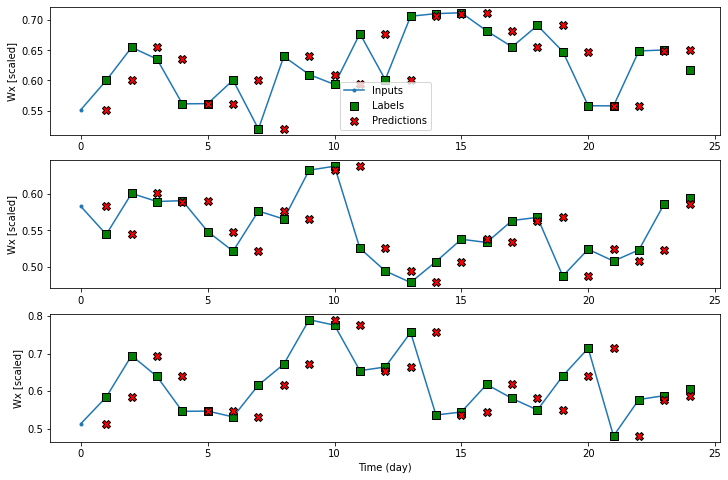

In [77]:
wide_window.plot(baseline_last)



In [78]:
print(performance['Baseline - Last'][1])

0.037695225328207016


**Multi Step BaseLine Model**

In [79]:
multi_window = DataWindow(input_width=24, label_width=24, shift=24, label_columns=['Wx'])

In [80]:
class MultiStepLastBaseline(Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index
        
    def call(self, inputs):
        if self.label_index is None:
            return tf.tile(inputs[:, -1:, :], [1, 24, 1])
        return tf.tile(inputs[:, -1:, self.label_index:], [1, 24, 1])

In [81]:
multi_baseline_last = MultiStepLastBaseline(label_index=column_indices['Wx'])

multi_baseline_last.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Baseline - Last'] = multi_baseline_last.evaluate(multi_window.val)
multi_performance['Baseline - Last'] = multi_baseline_last.evaluate(multi_window.test, verbose=0)

10/10 [==============================] - 0s 2ms/step - loss: 0.1186 - mean_absolute_error: 0.2793


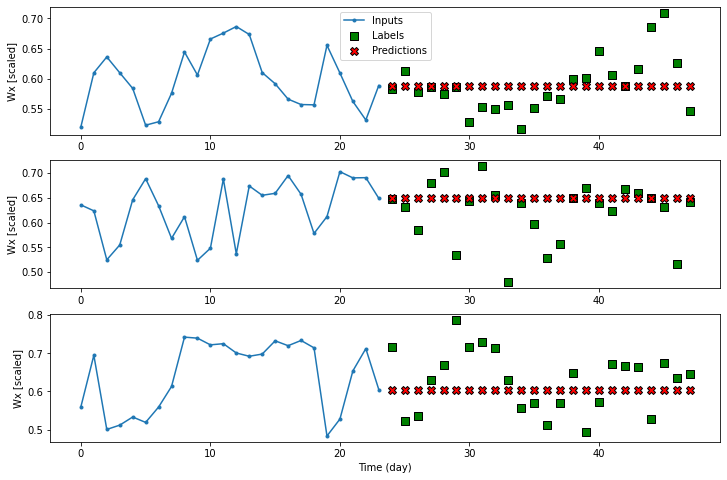

In [82]:
multi_window.plot(multi_baseline_last)

In [83]:
print(multi_performance['Baseline - Last'][1])

0.27713125944137573


In [84]:
class RepeatBaseline(Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index
        
    def call(self, inputs):
        return inputs[:, :, self.label_index:]

In [85]:
ms_baseline_repeat = RepeatBaseline(label_index=column_indices['Wx'])

ms_baseline_repeat.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

multi_val_performance['Baseline - Repeat'] = ms_baseline_repeat.evaluate(multi_window.val)
multi_performance['Baseline - Repeat'] = ms_baseline_repeat.evaluate(multi_window.test, verbose=0)

10/10 [==============================] - 0s 3ms/step - loss: 0.1199 - mean_absolute_error: 0.2793


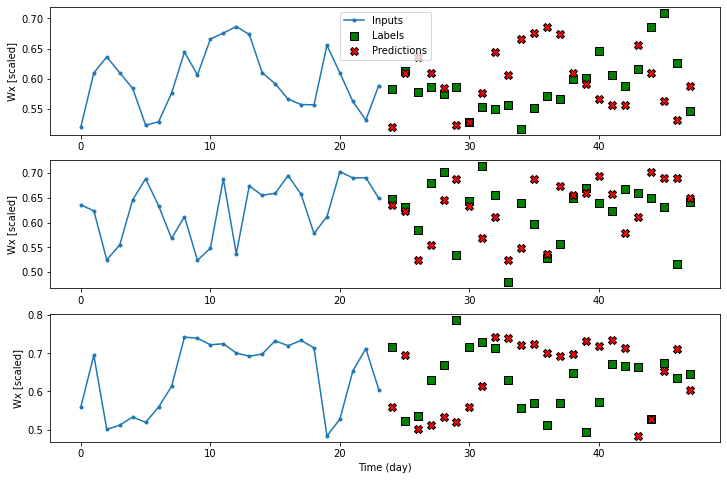

In [86]:
multi_window.plot(ms_baseline_repeat)

In [87]:
print(multi_performance['Baseline - Repeat'][1])

0.27819591760635376


# **Multi Output Baseline model**

In [88]:
multiop_single_step_window = DataWindow(input_width=1, label_width=1, shift=1, label_columns=['Wx','Wy']) 
multiop_wide_window = DataWindow(input_width=24, label_width=24, shift=1, label_columns=['Wx','Wy'])

In [89]:
print(column_indices['Wx'])
print(column_indices['Wy'])

4
5


In [90]:
multiop_baseline_last = Baseline(label_index=[0, 2])

multiop_baseline_last.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

multiop_val_performance = {}
multiop_performance = {}

multiop_val_performance['Baseline - Last'] = multiop_baseline_last.evaluate(multiop_wide_window.val)
multiop_performance['Baseline - Last'] = multiop_baseline_last.evaluate(multiop_wide_window.test, verbose=0)

11/11 [==============================] - 0s 2ms/step - loss: 0.0735 - mean_absolute_error: 0.2250


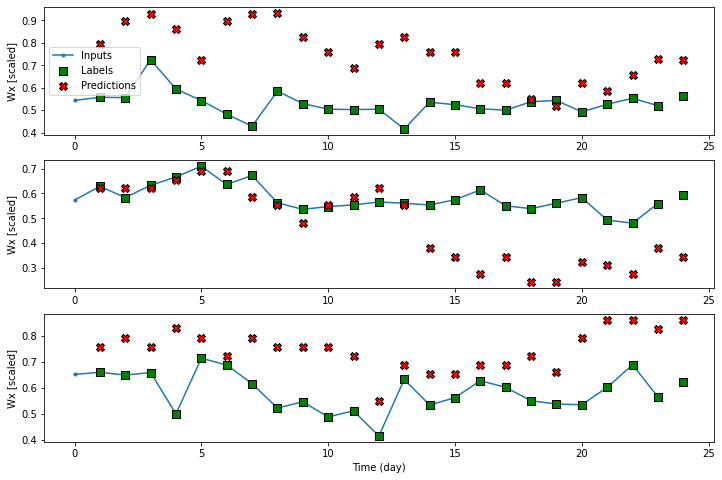

In [91]:
multiop_wide_window.plot(multiop_baseline_last)

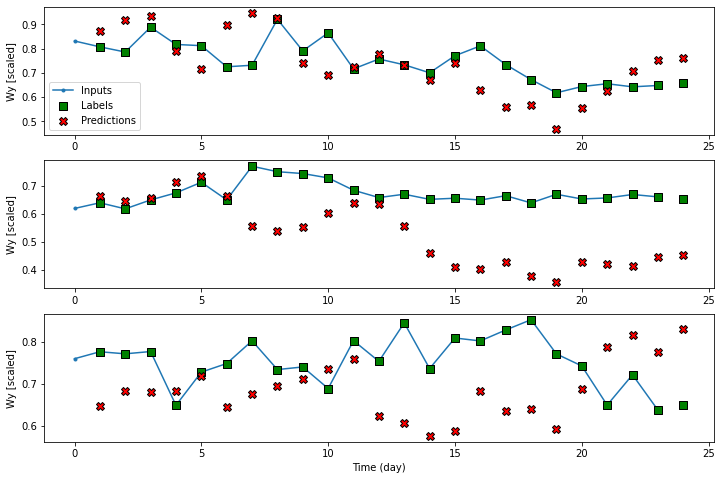

In [92]:
multiop_wide_window.plot(model=multiop_baseline_last, plot_col='Wy')

In [93]:
multiop_val_performance['Baseline - Last']
multiop_performance['Baseline - Last']

[0.13675130903720856, 0.32539743185043335]

# **Linear Model**

In [94]:
def compile_fit(model, window, patience=3, max_epochs=50):
    early_stopping = EarlyStopping(monitor='val_loss',
                                   patience=patience,
                                   mode='min')
    
    model.compile(loss=MeanSquaredError(),
                  optimizer=Adam(),
                  metrics=[MeanAbsoluteError()])
    
    history = model.fit(window.train,
                       epochs=max_epochs,
                       validation_data=window.val,
                       callbacks=[early_stopping])
    
    return history

In [95]:

linear_model = Sequential([Dense(units=1)])

history = compile_fit(linear_model, single_step_window)

val_performance['Linear'] = linear_model.evaluate(single_step_window.val)
performance['Linear'] = linear_model.evaluate(single_step_window.test, verbose=0)

Epoch 1/50
40/40 [==============================] - 1s 8ms/step - loss: 1.0118 - mean_absolute_error: 0.9735 - val_loss: 0.7479 - val_mean_absolute_error: 0.8336
Epoch 2/50
40/40 [==============================] - 0s 5ms/step - loss: 0.6559 - mean_absolute_error: 0.7713 - val_loss: 0.4702 - val_mean_absolute_error: 0.6467
Epoch 3/50
40/40 [==============================] - 0s 6ms/step - loss: 0.4112 - mean_absolute_error: 0.5943 - val_loss: 0.2882 - val_mean_absolute_error: 0.4867
Epoch 4/50
40/40 [==============================] - 0s 7ms/step - loss: 0.2542 - mean_absolute_error: 0.4469 - val_loss: 0.1760 - val_mean_absolute_error: 0.3602
Epoch 5/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1599 - mean_absolute_error: 0.3381 - val_loss: 0.1122 - val_mean_absolute_error: 0.2780
Epoch 6/50
40/40 [==============================] - 0s 7ms/step - loss: 0.1067 - mean_absolute_error: 0.2678 - val_loss: 0.0786 - val_mean_absolute_error: 0.2283
Epoch 7/50
40/40 [==========

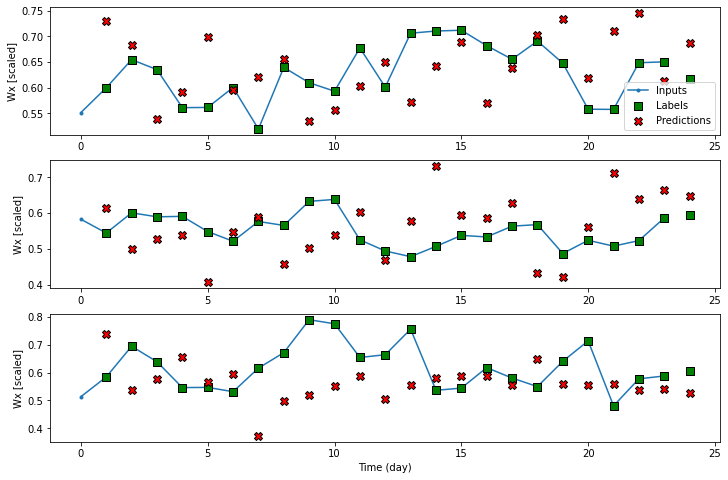

In [96]:
wide_window.plot(linear_model)

**Multi step Linear Model**

In [97]:
ms_linear = Sequential([
    Dense(1, kernel_initializer=tf.initializers.zeros)
])

history = compile_fit(ms_linear, multi_window)


multi_val_performance['Linear'] = ms_linear.evaluate(multi_window.val)
multi_performance['Linear'] = ms_linear.evaluate(multi_window.test, verbose=0)

Epoch 1/50
39/39 [==============================] - 1s 10ms/step - loss: 0.2672 - mean_absolute_error: 0.5081 - val_loss: 0.1441 - val_mean_absolute_error: 0.3728
Epoch 2/50
39/39 [==============================] - 0s 5ms/step - loss: 0.1132 - mean_absolute_error: 0.3225 - val_loss: 0.0515 - val_mean_absolute_error: 0.2118
Epoch 3/50
39/39 [==============================] - 0s 6ms/step - loss: 0.0440 - mean_absolute_error: 0.1884 - val_loss: 0.0183 - val_mean_absolute_error: 0.1143
Epoch 4/50
39/39 [==============================] - 0s 7ms/step - loss: 0.0199 - mean_absolute_error: 0.1203 - val_loss: 0.0102 - val_mean_absolute_error: 0.0834
Epoch 5/50
39/39 [==============================] - 0s 5ms/step - loss: 0.0134 - mean_absolute_error: 0.0978 - val_loss: 0.0091 - val_mean_absolute_error: 0.0786
Epoch 6/50
39/39 [==============================] - 0s 5ms/step - loss: 0.0117 - mean_absolute_error: 0.0902 - val_loss: 0.0091 - val_mean_absolute_error: 0.0773
Epoch 7/50
39/39 [=========

In [98]:

multi_val_performance['Linear']
multi_performance['Linear']

[0.003682263195514679, 0.0478978268802166]

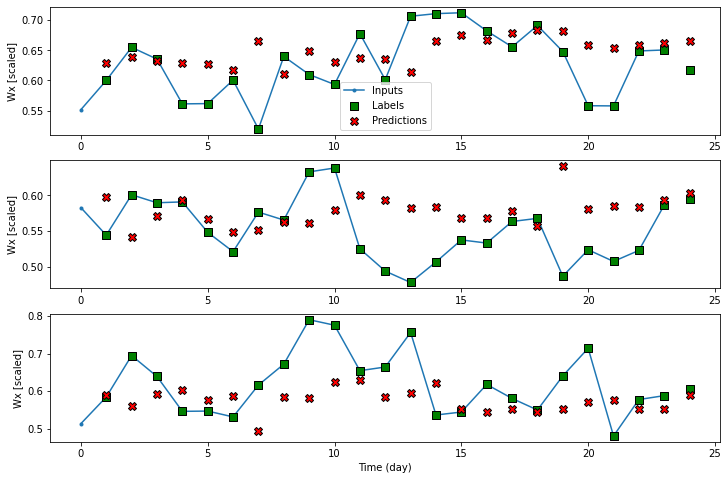

In [99]:
wide_window.plot(ms_linear)

**Multi Output Linear Model**

In [100]:
multio_linear = Sequential([
    Dense(units=2)
])

history = compile_fit(multio_linear, multiop_single_step_window)

multiop_val_performance['Linear'] = multio_linear.evaluate(multiop_wide_window.val)
multiop_performance['Linear'] = multio_linear.evaluate(multiop_wide_window.test, verbose=0)

Epoch 1/50
40/40 [==============================] - 1s 8ms/step - loss: 0.2952 - mean_absolute_error: 0.4421 - val_loss: 0.2174 - val_mean_absolute_error: 0.3704
Epoch 2/50
40/40 [==============================] - 0s 6ms/step - loss: 0.1648 - mean_absolute_error: 0.3122 - val_loss: 0.1283 - val_mean_absolute_error: 0.2768
Epoch 3/50
40/40 [==============================] - 1s 14ms/step - loss: 0.1061 - mean_absolute_error: 0.2452 - val_loss: 0.0867 - val_mean_absolute_error: 0.2256
Epoch 4/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0795 - mean_absolute_error: 0.2137 - val_loss: 0.0668 - val_mean_absolute_error: 0.1999
Epoch 5/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0671 - mean_absolute_error: 0.1975 - val_loss: 0.0562 - val_mean_absolute_error: 0.1856
Epoch 6/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0600 - mean_absolute_error: 0.1868 - val_loss: 0.0498 - val_mean_absolute_error: 0.1753
Epoch 7/50
40/40 [=========

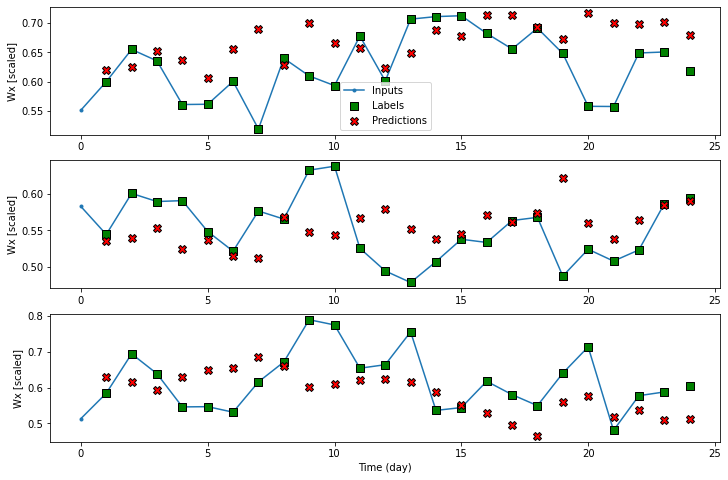

In [101]:
wide_window.plot(multio_linear)

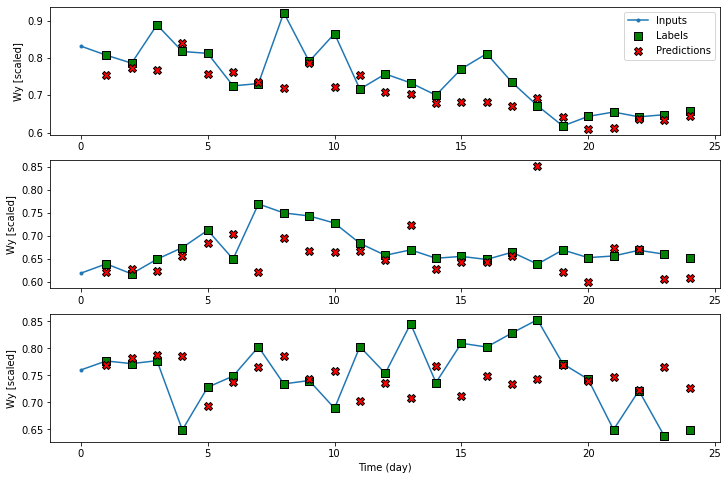

In [102]:
multiop_wide_window.plot(model=multio_linear, plot_col='Wy')

In [103]:
multiop_val_performance['Linear']
multiop_performance['Linear']

[0.004413174465298653, 0.05160467326641083]

## **Single Step Deep Learning Network**

In [106]:
history = compile_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/50
40/40 [==============================] - 1s 12ms/step - loss: 0.0182 - mean_absolute_error: 0.1066 - val_loss: 0.0056 - val_mean_absolute_error: 0.0587
Epoch 2/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0562 - val_loss: 0.0029 - val_mean_absolute_error: 0.0414
Epoch 3/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0501 - val_loss: 0.0026 - val_mean_absolute_error: 0.0398
Epoch 4/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0475 - val_loss: 0.0025 - val_mean_absolute_error: 0.0389
Epoch 5/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0459 - val_loss: 0.0031 - val_mean_absolute_error: 0.0441
Epoch 6/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0036 - mean_absolute_error: 0.0443 - val_loss: 0.0023 - val_mean_absolute_error: 0.0374
Epoch 7/50
40/40 [=========

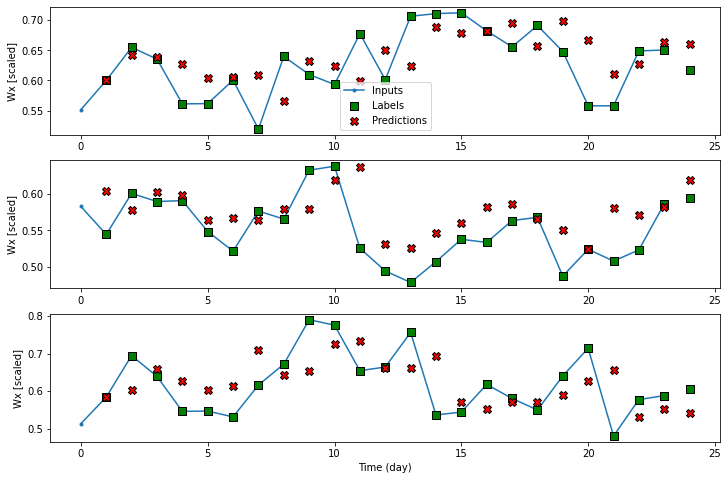

In [107]:
wide_window.plot(dense)


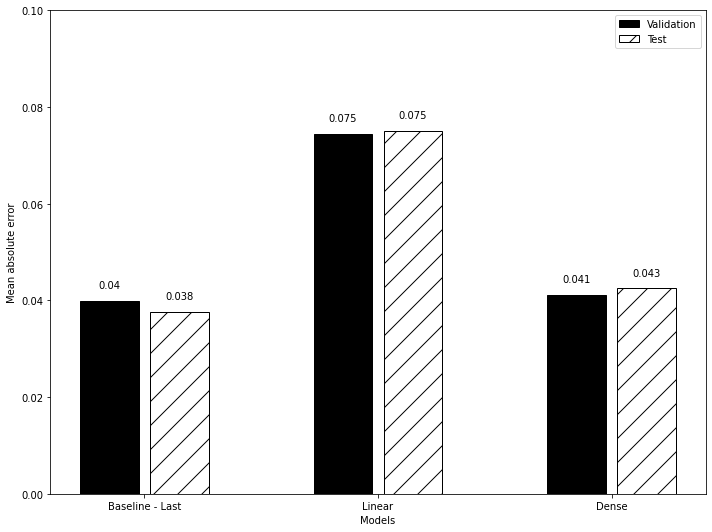

In [108]:
mae_val = [v[1] for v in val_performance.values()]
mae_test = [v[1] for v in performance.values()]

x = np.arange(len(performance))

fig, ax = plt.subplots()
ax.bar(x - 0.15, mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x + 0.15, mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')

for index, value in enumerate(mae_val):
    plt.text(x=index - 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')
    
for index, value in enumerate(mae_test):
    plt.text(x=index + 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')

plt.ylim(0, 0.1)
plt.xticks(ticks=x, labels=performance.keys())
plt.legend(loc='best')
plt.tight_layout()

# **Multi Step DNN**

In [109]:
ms_dense = Sequential([
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, kernel_initializer=tf.initializers.zeros),
])

history = compile_fit(ms_dense, multi_window)


multi_val_performance['Dense'] = ms_dense.evaluate(multi_window.val)
multi_performance['Dense'] = ms_dense.evaluate(multi_window.test, verbose=0)

Epoch 1/50
39/39 [==============================] - 1s 12ms/step - loss: 0.1617 - mean_absolute_error: 0.3442 - val_loss: 0.0219 - val_mean_absolute_error: 0.1177
Epoch 2/50
39/39 [==============================] - 0s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0747 - val_loss: 0.0040 - val_mean_absolute_error: 0.0481
Epoch 3/50
39/39 [==============================] - 0s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0542 - val_loss: 0.0035 - val_mean_absolute_error: 0.0452
Epoch 4/50
39/39 [==============================] - 0s 7ms/step - loss: 0.0047 - mean_absolute_error: 0.0518 - val_loss: 0.0034 - val_mean_absolute_error: 0.0453
Epoch 5/50
39/39 [==============================] - 0s 7ms/step - loss: 0.0045 - mean_absolute_error: 0.0505 - val_loss: 0.0033 - val_mean_absolute_error: 0.0446
Epoch 6/50
39/39 [==============================] - 0s 8ms/step - loss: 0.0044 - mean_absolute_error: 0.0499 - val_loss: 0.0038 - val_mean_absolute_error: 0.0482
Epoch 7/50
39/39 [=========

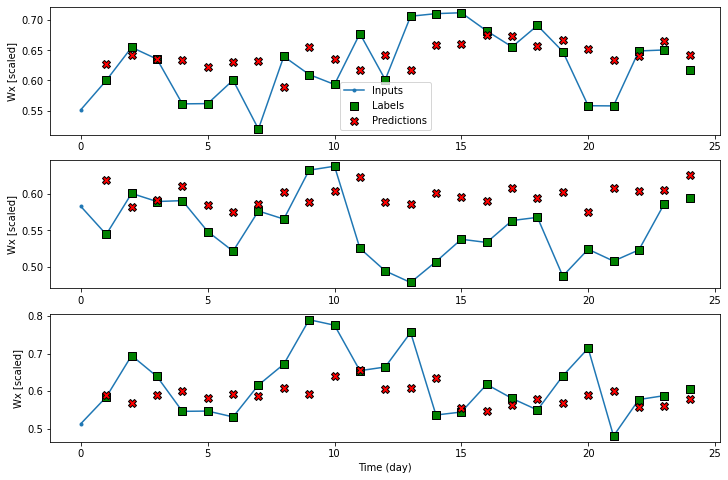

In [110]:
wide_window.plot(ms_dense)

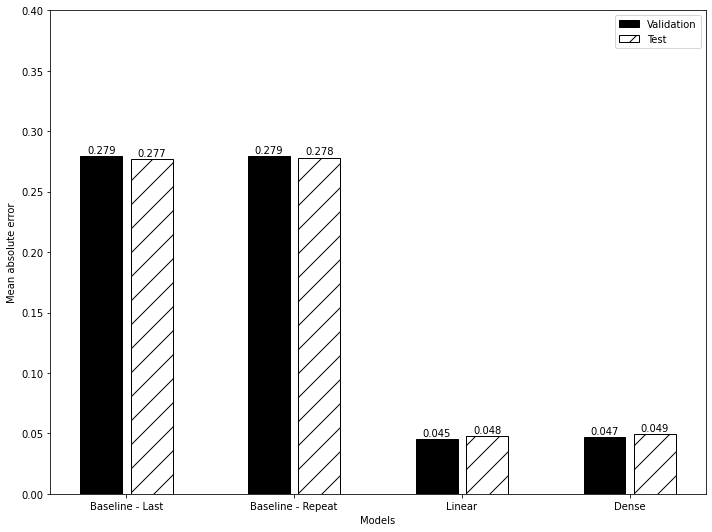

In [111]:
ms_mae_val = [v[1] for v in multi_val_performance.values()]
ms_mae_test = [v[1] for v in multi_performance.values()]

x = np.arange(len(multi_performance))

fig, ax = plt.subplots()
ax.bar(x - 0.15, ms_mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x + 0.15, ms_mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')

for index, value in enumerate(ms_mae_val):
    plt.text(x=index - 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')
    
for index, value in enumerate(ms_mae_test):
    plt.text(x=index + 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')

plt.ylim(0, 0.4)
plt.xticks(ticks=x, labels=multi_performance.keys())
plt.legend(loc='best')
plt.tight_layout()

# **Multi Output DNN**

In [112]:
mo_dense = Sequential([
    Dense(units=64, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=2)
])

In [113]:
history = compile_fit(mo_dense, multiop_single_step_window)

multiop_val_performance['dense'] = mo_dense.evaluate(multiop_wide_window.val)
multiop_performance['dense'] = mo_dense.evaluate(multiop_wide_window.test, verbose=0)

Epoch 1/50
40/40 [==============================] - 1s 9ms/step - loss: 0.1146 - mean_absolute_error: 0.2477 - val_loss: 0.0079 - val_mean_absolute_error: 0.0746
Epoch 2/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0576 - val_loss: 0.0034 - val_mean_absolute_error: 0.0441
Epoch 3/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0450 - val_loss: 0.0031 - val_mean_absolute_error: 0.0414
Epoch 4/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0431 - val_loss: 0.0034 - val_mean_absolute_error: 0.0439
Epoch 5/50
40/40 [==============================] - 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0417 - val_loss: 0.0031 - val_mean_absolute_error: 0.0415
Epoch 6/50
40/40 [==============================] - 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0408 - val_loss: 0.0026 - val_mean_absolute_error: 0.0373
Epoch 7/50
40/40 [==========

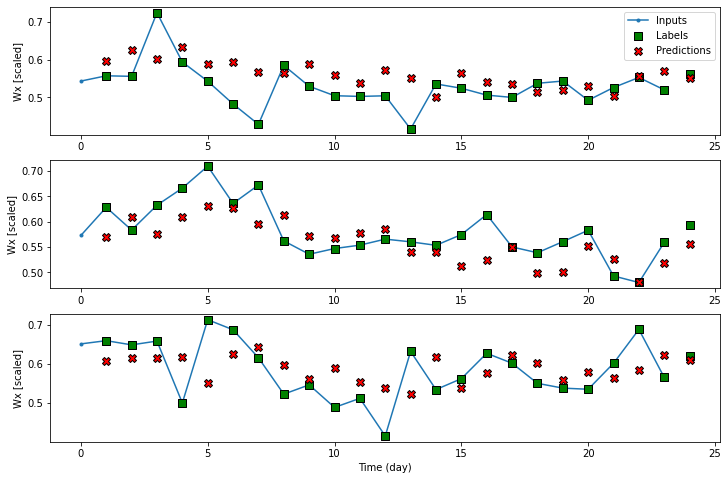

In [114]:
multiop_wide_window.plot(model=mo_dense)

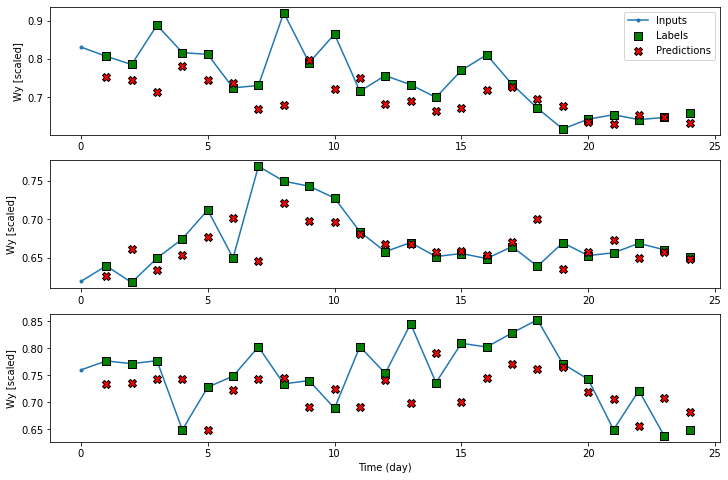

In [115]:

multiop_wide_window.plot(model=mo_dense, plot_col='Wy')

In [116]:
multiop_val_performance
multiop_performance

{'Baseline - Last': [0.13675130903720856, 0.32539743185043335],
 'Linear': [0.004413174465298653, 0.05160467326641083],
 'dense': [0.0017421620432287455, 0.032620932906866074]}

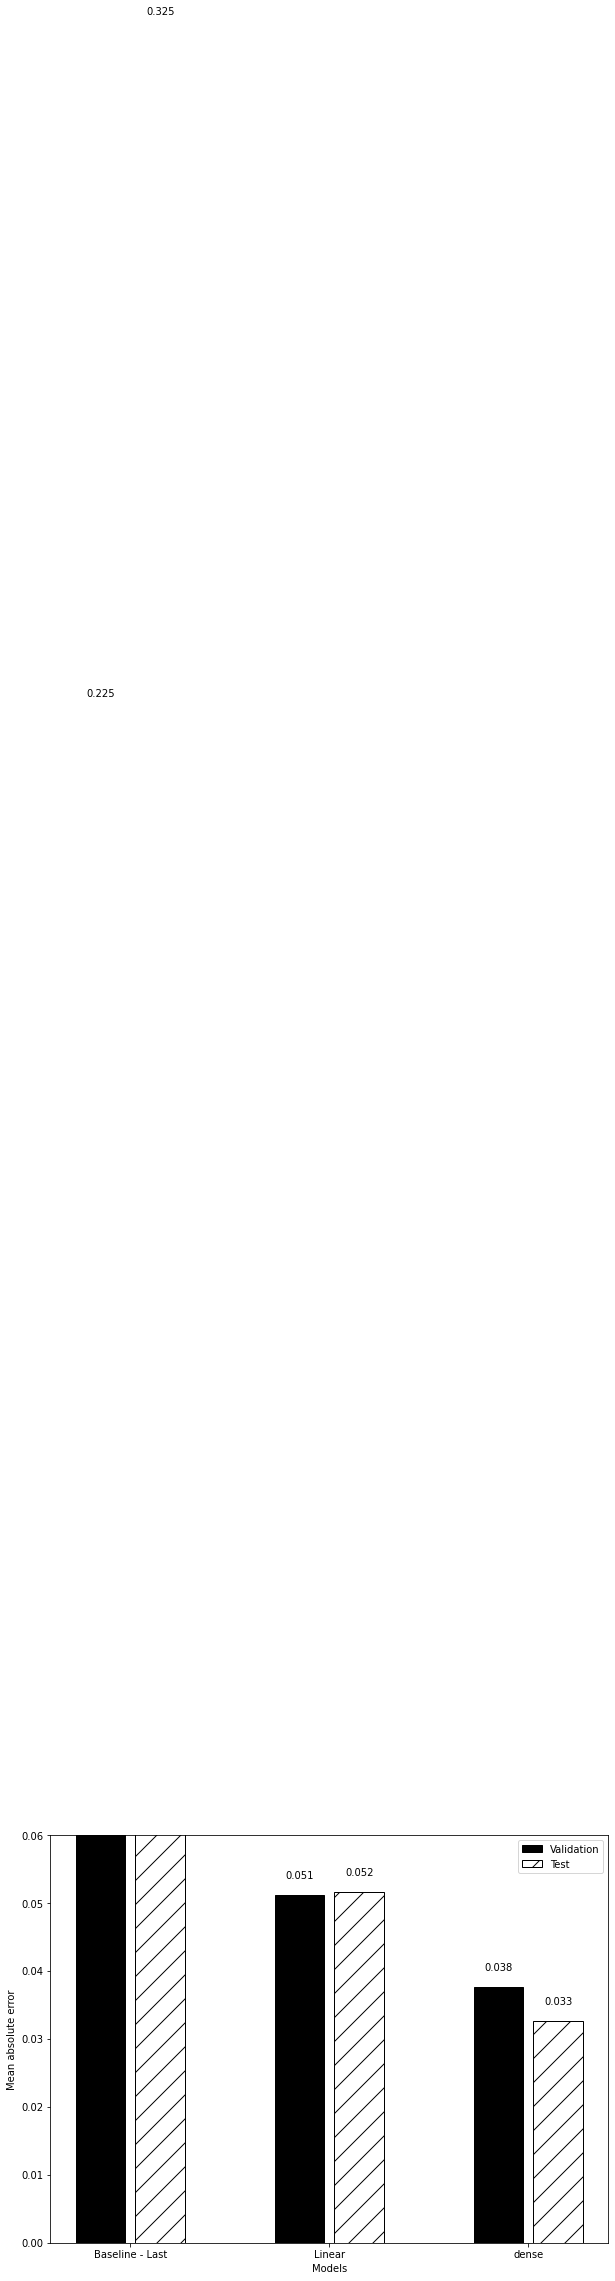

In [117]:
mo_mae_val = [v[1] for v in multiop_val_performance.values()]
mo_mae_test = [v[1] for v in multiop_performance.values()]

x = np.arange(len(multiop_performance))

fig, ax = plt.subplots()
ax.bar(x - 0.15, mo_mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x + 0.15, mo_mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')

for index, value in enumerate(mo_mae_val):
    plt.text(x=index - 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')
    
for index, value in enumerate(mo_mae_test):
    plt.text(x=index + 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')

plt.ylim(0, 0.06)
plt.xticks(ticks=x, labels=multiop_performance.keys())
plt.legend(loc='best')
plt.tight_layout()

### **LSTM**

**SINGLE STEP LSTM**

In [118]:
single_step_window = DataWindow(input_width=1, label_width=1, shift=1, label_columns=['Wx']) 
wide_window = DataWindow(input_width=24, label_width=24, shift=1, label_columns=['Wx'])

In [119]:

lstm_model = Sequential([
    LSTM(32, return_sequences=True),
    Dense(units=1)
])

history = compile_fit(lstm_model, wide_window)



val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/50
40/40 [==============================] - 4s 28ms/step - loss: 0.1465 - mean_absolute_error: 0.2945 - val_loss: 0.0264 - val_mean_absolute_error: 0.1125
Epoch 2/50
40/40 [==============================] - 1s 15ms/step - loss: 0.0269 - mean_absolute_error: 0.1113 - val_loss: 0.0197 - val_mean_absolute_error: 0.1001
Epoch 3/50
40/40 [==============================] - 1s 15ms/step - loss: 0.0196 - mean_absolute_error: 0.0923 - val_loss: 0.0140 - val_mean_absolute_error: 0.0804
Epoch 4/50
40/40 [==============================] - 1s 16ms/step - loss: 0.0145 - mean_absolute_error: 0.0782 - val_loss: 0.0102 - val_mean_absolute_error: 0.0680
Epoch 5/50
40/40 [==============================] - 1s 15ms/step - loss: 0.0113 - mean_absolute_error: 0.0703 - val_loss: 0.0082 - val_mean_absolute_error: 0.0618
Epoch 6/50
40/40 [==============================] - 1s 16ms/step - loss: 0.0095 - mean_absolute_error: 0.0658 - val_loss: 0.0074 - val_mean_absolute_error: 0.0614
Epoch 7/50
40/40 [====

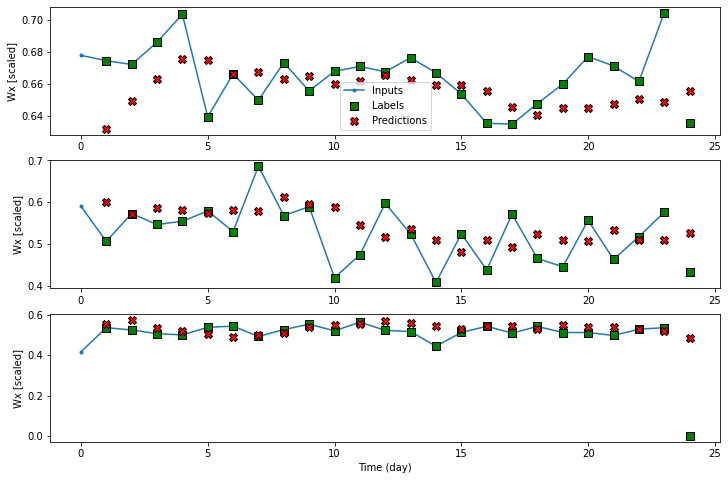

In [120]:
wide_window.plot(lstm_model)

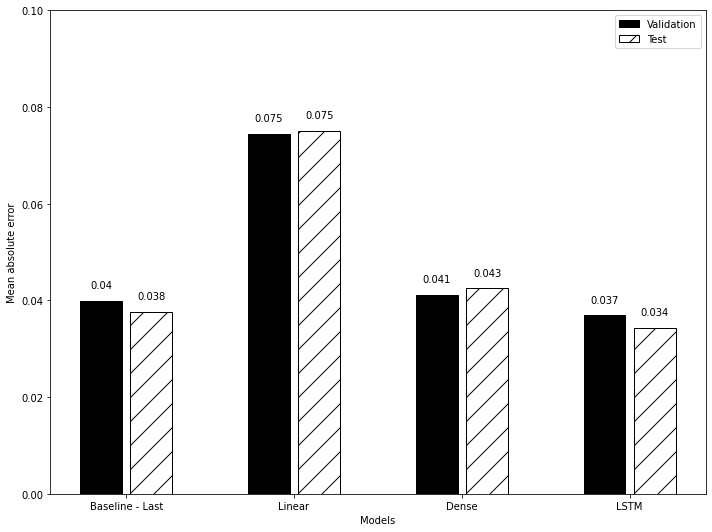

In [121]:
mae_val = [v[1] for v in val_performance.values()]
mae_test = [v[1] for v in performance.values()]

x = np.arange(len(performance))

fig, ax = plt.subplots()
ax.bar(x - 0.15, mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x + 0.15, mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')

for index, value in enumerate(mae_val):
    plt.text(x=index - 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')
    
for index, value in enumerate(mae_test):
    plt.text(x=index + 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')

plt.ylim(0, 0.1)
plt.xticks(ticks=x, labels=performance.keys())
plt.legend(loc='best')
plt.tight_layout()

**Multi Step LSTM**

In [122]:
multi_window = DataWindow(input_width=24, label_width=24, shift=24, label_columns=['Wx'])

In [123]:
ms_lstm_model = Sequential([
    LSTM(32, return_sequences=True),
    Dense(1, kernel_initializer=tf.initializers.zeros),
])

history = compile_fit(ms_lstm_model, multi_window)




multi_val_performance['LSTM'] = ms_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = ms_lstm_model.evaluate(multi_window.test, verbose=0)

Epoch 1/50
39/39 [==============================] - 3s 27ms/step - loss: 0.1777 - mean_absolute_error: 0.3679 - val_loss: 0.0447 - val_mean_absolute_error: 0.1873
Epoch 2/50
39/39 [==============================] - 1s 16ms/step - loss: 0.0268 - mean_absolute_error: 0.1128 - val_loss: 0.0203 - val_mean_absolute_error: 0.1034
Epoch 3/50
39/39 [==============================] - 1s 16ms/step - loss: 0.0196 - mean_absolute_error: 0.0920 - val_loss: 0.0159 - val_mean_absolute_error: 0.0889
Epoch 4/50
39/39 [==============================] - 1s 15ms/step - loss: 0.0163 - mean_absolute_error: 0.0847 - val_loss: 0.0134 - val_mean_absolute_error: 0.0823
Epoch 5/50
39/39 [==============================] - 1s 15ms/step - loss: 0.0140 - mean_absolute_error: 0.0791 - val_loss: 0.0118 - val_mean_absolute_error: 0.0791
Epoch 6/50
39/39 [==============================] - 1s 16ms/step - loss: 0.0122 - mean_absolute_error: 0.0748 - val_loss: 0.0103 - val_mean_absolute_error: 0.0742
Epoch 7/50
39/39 [====

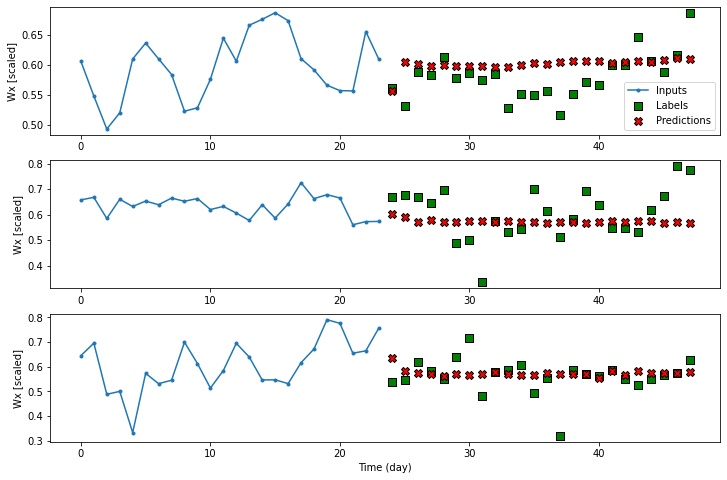

In [124]:
multi_window.plot(ms_lstm_model)

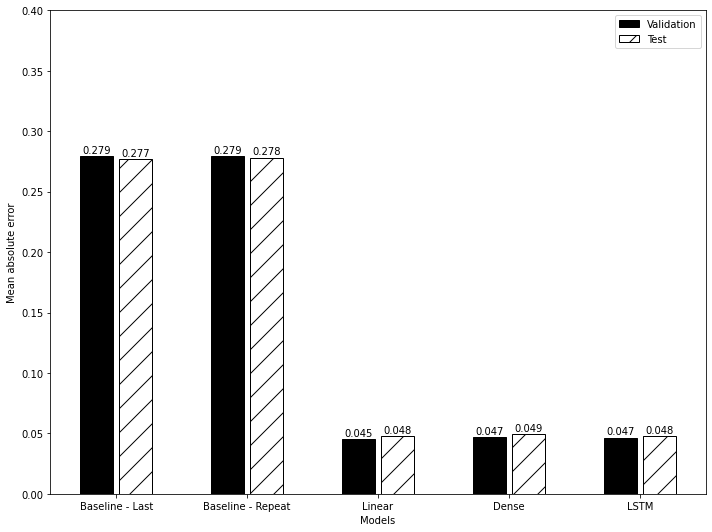

In [125]:
ms_mae_val = [v[1] for v in multi_val_performance.values()]
ms_mae_test = [v[1] for v in multi_performance.values()]

x = np.arange(len(multi_performance))

fig, ax = plt.subplots()
ax.bar(x - 0.15, ms_mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x + 0.15, ms_mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')

for index, value in enumerate(ms_mae_val):
    plt.text(x=index - 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')
    
for index, value in enumerate(ms_mae_test):
    plt.text(x=index + 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')

plt.ylim(0, 0.4)
plt.xticks(ticks=x, labels=multi_performance.keys())
plt.legend(loc='best')
plt.tight_layout()

**Multi Output LSTM model**

In [126]:
mo_single_step_window = DataWindow(input_width=1, label_width=1, shift=1, label_columns=['Wx','Wy']) 
mo_wide_window = DataWindow(input_width=24, label_width=24, shift=1, label_columns=['Wx','Wy'])

In [127]:
mo_lstm_model = Sequential([
    LSTM(32, return_sequences=True),
    Dense(units = 2)
])

history = compile_fit(mo_lstm_model, mo_wide_window)

multiop_val_performance['LSTM'] = mo_lstm_model.evaluate(multiop_wide_window.val)
multiop_performance['LSTM'] = mo_lstm_model.evaluate(multiop_wide_window.test, verbose=0)



Epoch 1/50
40/40 [==============================] - 4s 35ms/step - loss: 0.0835 - mean_absolute_error: 0.2134 - val_loss: 0.0317 - val_mean_absolute_error: 0.1188
Epoch 2/50
40/40 [==============================] - 1s 15ms/step - loss: 0.0237 - mean_absolute_error: 0.0982 - val_loss: 0.0178 - val_mean_absolute_error: 0.0800
Epoch 3/50
40/40 [==============================] - 1s 29ms/step - loss: 0.0150 - mean_absolute_error: 0.0747 - val_loss: 0.0123 - val_mean_absolute_error: 0.0676
Epoch 4/50
40/40 [==============================] - 1s 16ms/step - loss: 0.0113 - mean_absolute_error: 0.0660 - val_loss: 0.0095 - val_mean_absolute_error: 0.0604
Epoch 5/50
40/40 [==============================] - 1s 16ms/step - loss: 0.0092 - mean_absolute_error: 0.0609 - val_loss: 0.0081 - val_mean_absolute_error: 0.0586
Epoch 6/50
40/40 [==============================] - 1s 15ms/step - loss: 0.0077 - mean_absolute_error: 0.0569 - val_loss: 0.0066 - val_mean_absolute_error: 0.0528
Epoch 7/50
40/40 [====

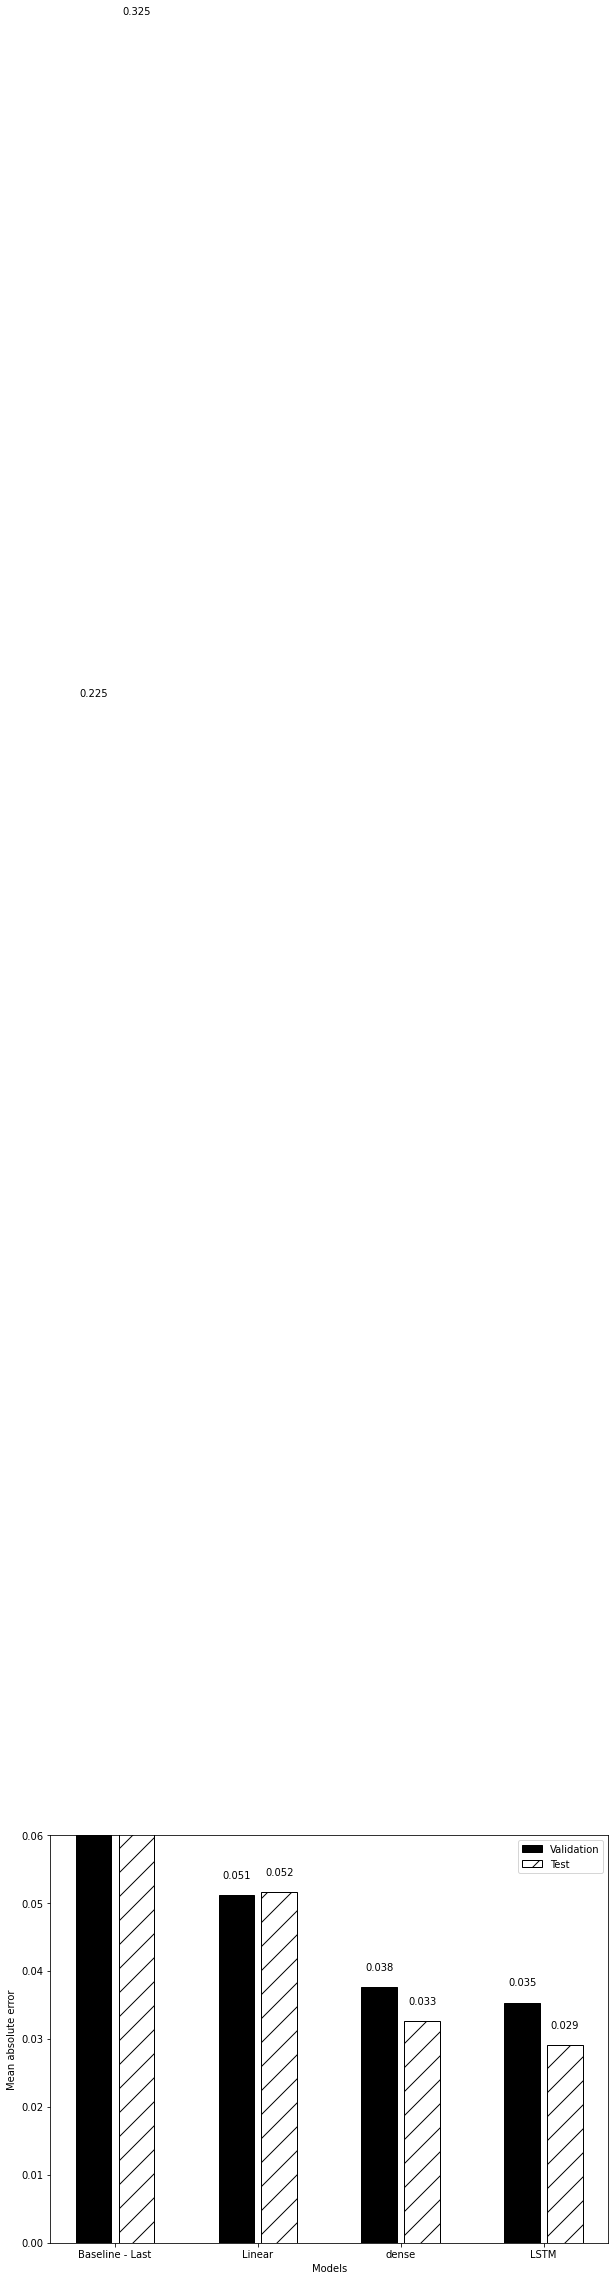

In [128]:
mo_mae_val = [v[1] for v in multiop_val_performance.values()]
mo_mae_test = [v[1] for v in multiop_performance.values()]

x = np.arange(len(multiop_performance))

fig, ax = plt.subplots()
ax.bar(x - 0.15, mo_mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x + 0.15, mo_mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')

for index, value in enumerate(mo_mae_val):
    plt.text(x=index - 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')
    
for index, value in enumerate(mo_mae_test):
    plt.text(x=index + 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')

plt.ylim(0, 0.06)
plt.xticks(ticks=x, labels=multiop_performance.keys())
plt.legend(loc='best')
plt.tight_layout()

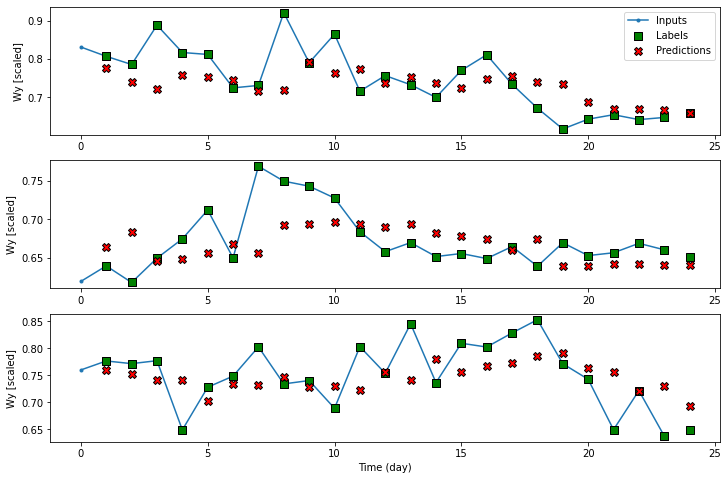

In [129]:

multiop_wide_window.plot(model=mo_lstm_model, plot_col='Wy')

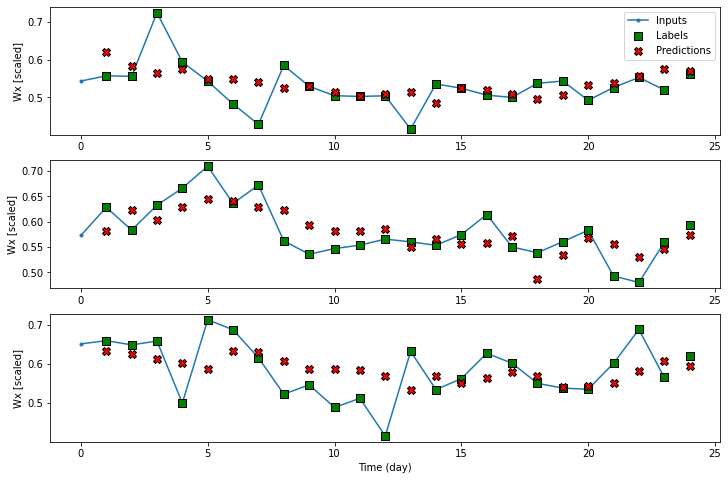

In [130]:

multiop_wide_window.plot(model=mo_lstm_model)